Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [8]:
library(tidymodels)

The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [9]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [10]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 1, 8, 1, 13, 5, 3, 6, 10, 4, …
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 103, 99, 97, 145, 117,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 30, 84, 66, 82, 92, 58, 92…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 38, 0, 15, 19, 0, 11, 0, 31,…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 83, 0, 140, 110, 0, 54, 0, 0,…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 43.3, 35.4, 23.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 0.183, 0.3…
$ Age                      <dbl> 31, 21, 30, 29, 30, 33, 50, 22, 57, 38, 22, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

Outcome is the suitable response variable for a logistic regression model because it is binary.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)          |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

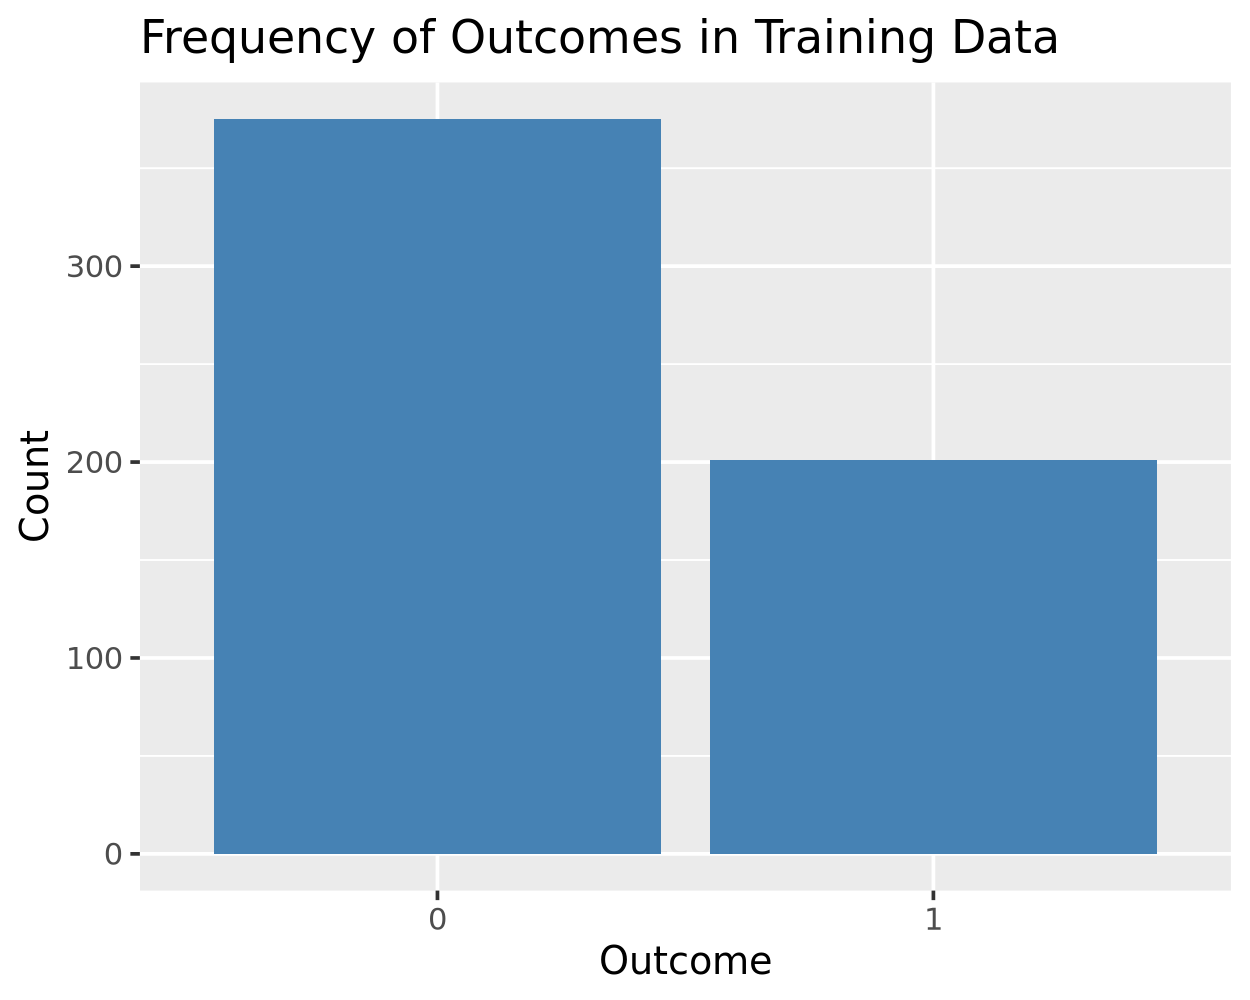

In [14]:
ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar(fill = "steelblue") +
  labs(
    title = "Frequency of Outcomes in Training Data",
    x = "Outcome",
    y = "Count"
  )


❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, the data is not balanced. There are substantially more observations with Outcome = 0 than Outcome = 1.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [13]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

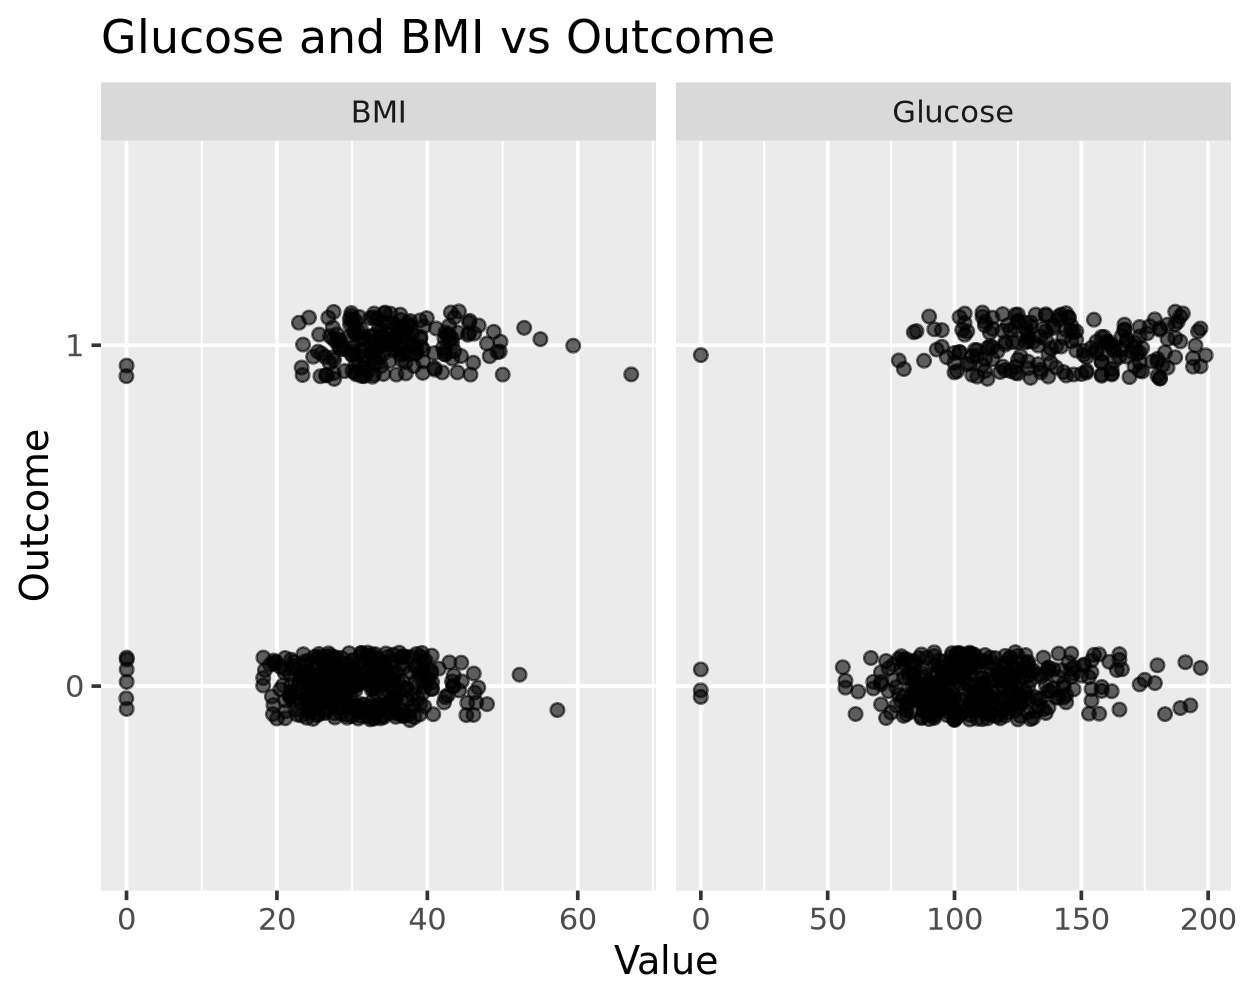

In [6]:
ggplot(plot_df, aes(x = value, y = Outcome)) +
  geom_jitter(height = 0.1, alpha = 0.6) +
  facet_wrap(~name, ncol = 2, scales = "free_x") +
  labs(
    title = "Glucose and BMI vs Outcome",
    x = "Value",
    y = "Outcome"
  )

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

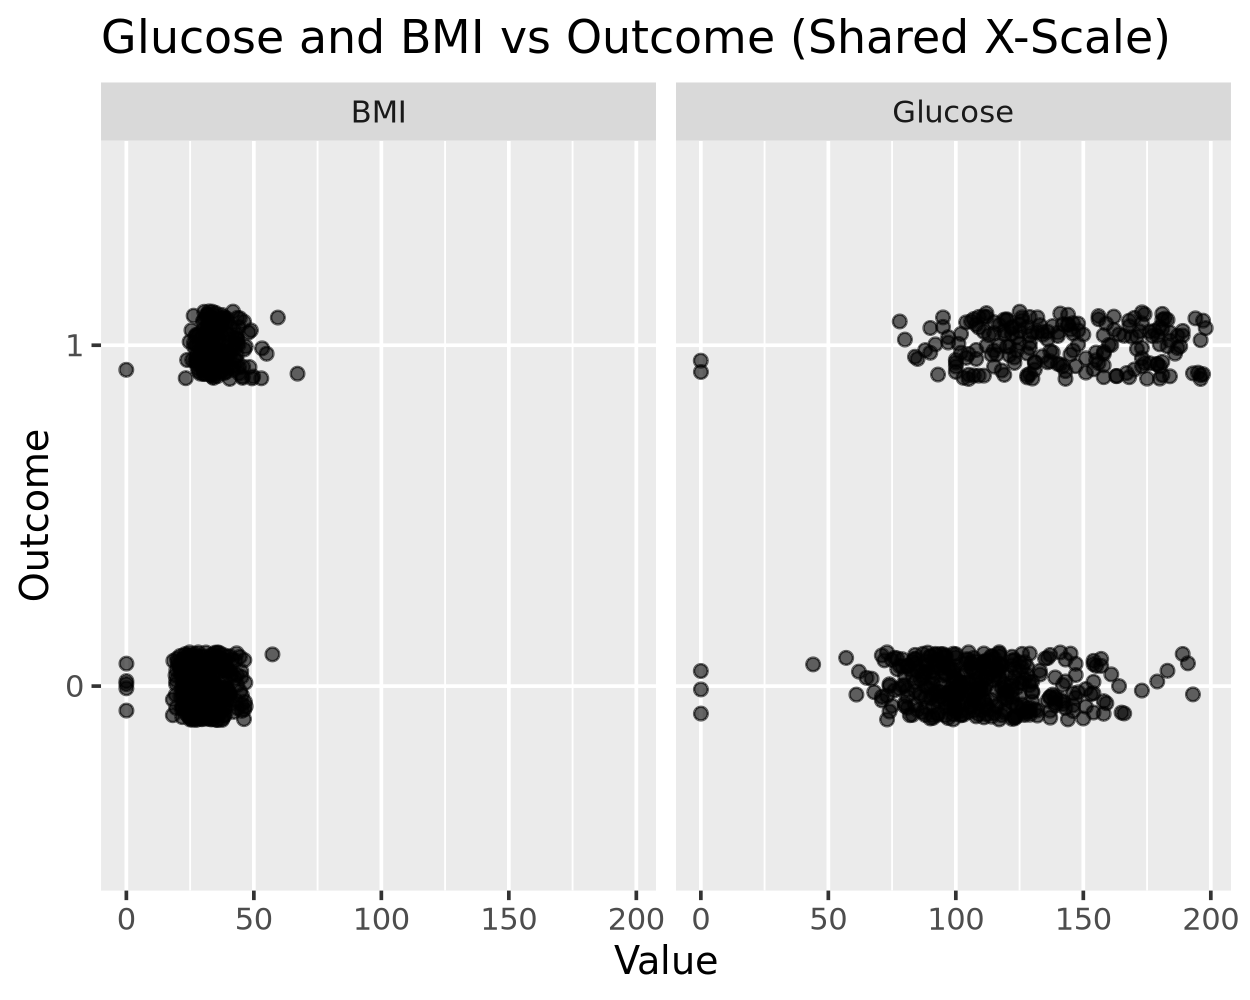

In [15]:
ggplot(plot_df, aes(x = value, y = Outcome)) +
  geom_jitter(height = 0.1, alpha = 0.6) +
  facet_wrap(~name, ncol = 2) +   # removed scales = "free_x"
  labs(
    title = "Glucose and BMI vs Outcome (Shared X-Scale)",
    x = "Value",
    y = "Outcome"
  )


When scales = "free_x" is removed, both facets share the same x-axis scale. Since Glucose and BMI have very different numeric ranges, the BMI panel becomes compressed and less visually informative compared to when each facet has its own scale.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [19]:
mod_fit = logistic_reg() |>
  set_engine("glm") |>
  fit(Outcome ~ BMI + Glucose, data = diabetes_train)

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [20]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [22]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 106  31
         1  19  36

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

67 individuals had diabetes in the test data.
36 were correctly predicted to have diabetes.
19 were predicted to have diabetes but did not actually have diabetes.